# VR Acuity Data Analysis 
Notebook for loading, presenting and first analysis of VR_Acuity_Data

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import h5py
%matplotlib inline

path = '../datasets/'
fname = 'VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC_clean.h5'
rat_position = pd.read_hdf(path+fname, 'Position')

xyz_mean = rat_position[['X', 'Y', 'Z']].mean()
print(xyz_mean)

X    0.008848
Y    0.099768
Z   -0.019866
dtype: float64


## Visualization of rat position

Text(0.5,1,'Z position')

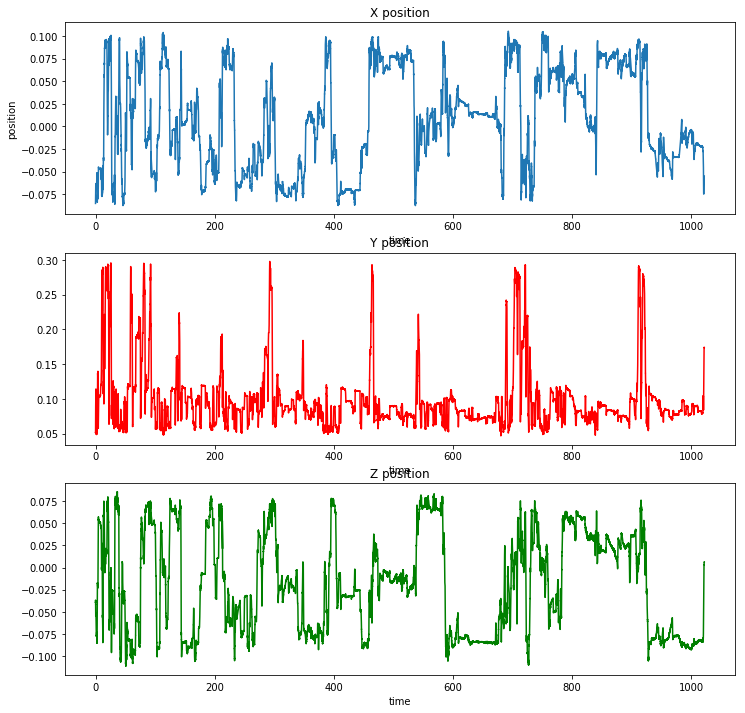

In [2]:
#postition - axes plot in time

X, Y, Z = rat_position.X, rat_position.Y, rat_position.Z
fig, axes = plt.subplots(3, 1, figsize=(12,12))

axes[0].plot(rat_position.Time, X)
axes[0].set_ylabel('position')
axes[0].set_xlabel('time')
axes[0].set_title('X position')

axes[1].plot(rat_position.Time, Y, c="red")
axes[1].set_xlabel('time')
axes[1].set_title('Y position')

axes[2].plot(rat_position.Time, Z, c="green")
axes[2].set_xlabel('time')
axes[2].set_title('Z position')


In [ ]:
#2D position scatter plot
plt.scatter(X[0:20000], Y[0:20000])

fig = plt.figure()
#ax = fig.add_subplot(111, polar = 'true')
#c = ax.scatter(X, Y)

In [ ]:
#3D position scatter plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, c='r')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')


In [ ]:
#3D partial position scatter plot 
r_stop = 1000
X, Y, Z = rat_position.X[0:r_stop], rat_position.Y[0:r_stop], rat_position.Z[0:r_stop]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, c='r')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

## Rotation

In [ ]:
rat_rotation = pd.read_hdf(path+fname, '/preprocessed/Rigid Body/Rat/Rotation')
r_stop = 1000

X, Y, Z = rat_rotation.X[0:r_stop], rat_rotation.Y[0:r_stop], rat_rotation.Z[0:r_stop]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, c='g')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

In [ ]:
#plotting head roatation in Y axis
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, polar = 'true')

c = ax.scatter(rat_rotation.Time, rat_rotation.Y)

## Rotation during events

In [ ]:
#Rotation of the head for single stimulation event

#Event location for data minimization
eventLog     = pd.read_hdf(path+fname, '/events/eventlog')
#eventNames  = pd.read_hdf(path+fname, '/events/eventNames')

start = eventLog.Time[4]
stop  = eventLog.Time[5]

print(len(rat_rotation.Time))
#print(rat_rotation.Time[2000])


for i,x in enumerate(rat_rotation.Time):
    if x == start:
        start_index = i

for i,x in enumerate(rat_rotation.Time):
    if x == stop:
        stop_index = i
        
        
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, polar = 'true')
c = ax.scatter(rat_rotation.Time[start_index:stop_index], rat_rotation.Y[start_index:stop_index])

